In [110]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [111]:
def potential(x):
    #2*x**2+3*torch.sin(torch.pi*x/2.4)*x*(1-torch.exp(-x/6))
    #x**3/20+torch.sin(torch.pi*x/10)*(20-x)*x+x**2/2
    #-10/x-8*(torch.sin(torch.pi*x/10))**2*torch.exp(-x/15)
    return  -(2 + torch.sin(2*torch.pi*x))*torch.exp(-x)

In [112]:
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)

# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float32
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mult=1
La=0
Lb =20
L=Lb-La  # domain length
N = 1600  # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)

# 控制势函数的大小
l_max=8
scale=10

en_num=50
extend_num=10
epoch=200000
lr=0.01

diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap

In [113]:
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag.flatten())
eigenvalues= torch.linalg.eigvalsh(A)
en=eigenvalues[:en_num]
print("Eigenvalues: \n",en)

Eigenvalues: 
 tensor([-1.5387e-01,  1.6487e-02,  6.2624e-02,  1.3951e-01,  2.4400e-01,
         3.7204e-01,  5.2970e-01,  7.0941e-01,  9.2174e-01,  1.1522e+00,
         1.4108e+00,  1.6925e+00,  1.9993e+00,  2.3310e+00,  2.6875e+00,
         3.0674e+00,  3.4707e+00,  3.8970e+00,  4.3470e+00,  4.8224e+00,
         5.3250e+00,  5.8550e+00,  6.4115e+00,  6.9935e+00,  7.5996e+00,
         8.2292e+00,  8.8824e+00,  9.5607e+00,  1.0264e+01,  1.0992e+01,
         1.1744e+01,  1.2521e+01,  1.3323e+01,  1.4149e+01,  1.4999e+01,
         1.5874e+01,  1.6774e+01,  1.7699e+01,  1.8648e+01,  1.9622e+01,
         2.0620e+01,  2.1643e+01,  2.2690e+01,  2.3762e+01,  2.4859e+01,
         2.5980e+01,  2.7126e+01,  2.8296e+01,  2.9491e+01,  3.0710e+01],
       device='cuda:0')


In [114]:
# Eigenvalues: 
#  tensor([-49.6564, -11.8940,  -4.2603,  -0.9685,   1.0854,   2.6298,   3.9087,
#           5.0257,   6.0326,   6.9598,   7.8261,   8.6439,   9.4215,  10.1661,
#          10.8820,  11.5732,  12.2428,  12.8932,  13.5262,  14.1437,  14.7470,
#          15.3371,  15.9153,  16.4825,  17.0395,  17.5867,  18.1254,  18.6553,
#          19.1778,  19.6924,  20.2010,  20.7009,  21.1965,  21.6851,  22.1676,
#          22.6460,  23.1179,  23.5851,  24.0482,  24.5059,  24.9578,  25.4080,
#          25.8541,  26.2947,  26.7318,  27.1655,  27.5956,  28.0222,  28.4454,
#          28.8654], device='cuda:5')

/tmp/ipykernel_1962123/1186928101.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


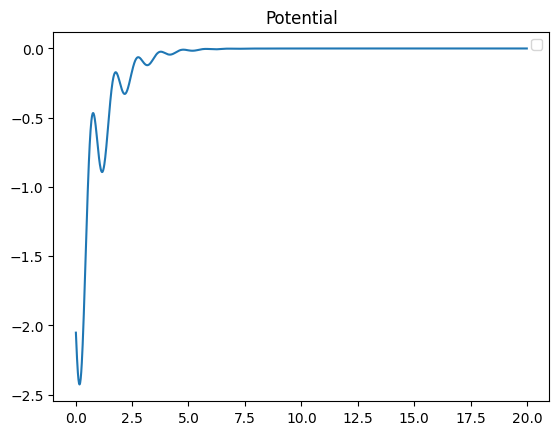

In [115]:
plt.plot(grid.cpu().numpy(),V_diag.cpu().numpy())
plt.title("Potential")
plt.legend()
plt.show()

In [116]:
eigs, eigv = torch.linalg.eigh(A)

# print("Eigenvalues: \n", eigs[:en_num])
# print("Eigenvectors: \n", eigv[:,:en_num])

tensor(1.0000, device='cuda:0')
normalization: tensor(0.1546, device='cuda:0')


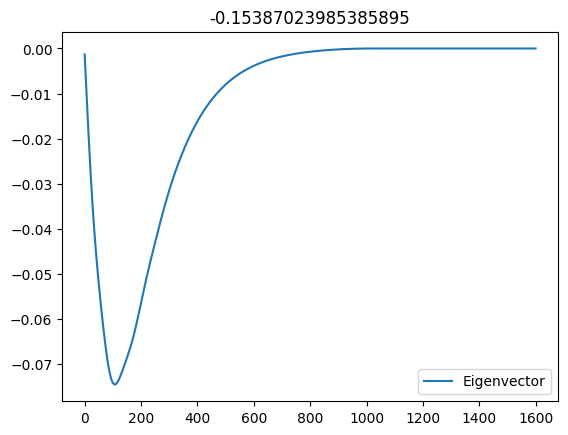

In [117]:
n=0
test_v=eigv[:,n]
test_vt=A@test_v
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
print(torch.norm(test_v))
norm=torch.norm(test_vt)
print('normalization:',norm)

plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
# plt.plot(test_vt.detach().cpu().numpy(),label="Eigenvector after applying A")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()

tensor(1.0000, device='cuda:0')


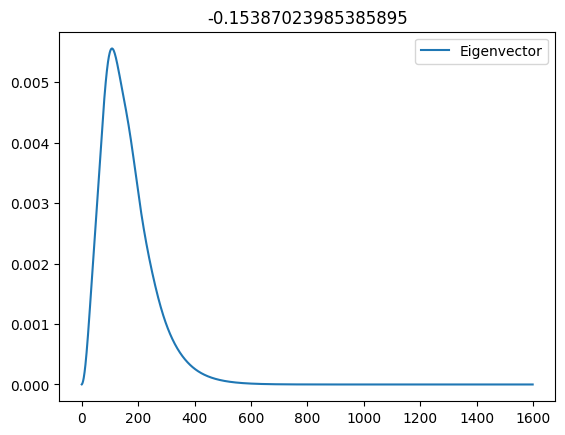

In [118]:
test_v=eigv[:,n]

# r=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# R=r[1:-1]
# R=1/R 
# test_v=test_v*R

print(torch.norm(test_v))
test_v=test_v**2
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm



plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()